<a href="https://colab.research.google.com/github/remidu34/Mnist/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrainement modèle

In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import numpy as np

In [2]:

print(tf.__version__)
#print(plt.__version__)

2.13.0


In [3]:
# Chargement des données de Mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("Taille de l'ensemble d'entraînement (images) :", train_images.shape)
print("Taille de l'ensemble d'entraînement (étiquettes) :", train_labels.shape)
print("Taille de l'ensemble de test (images) :", test_images.shape)
print("Taille de l'ensemble de test (étiquettes) :", test_labels.shape)

Taille de l'ensemble d'entraînement (images) : (60000, 28, 28)
Taille de l'ensemble d'entraînement (étiquettes) : (60000,)
Taille de l'ensemble de test (images) : (10000, 28, 28)
Taille de l'ensemble de test (étiquettes) : (10000,)


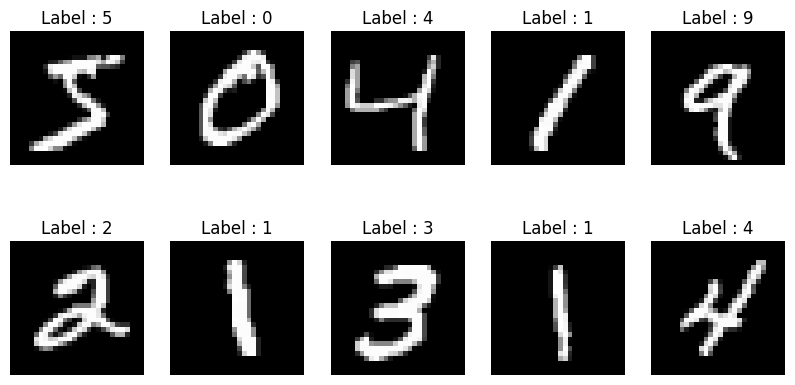

In [5]:
# Affichage des premières 10 images du jeu de données MNIST pour vérifier si j'ai bien des données
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label : {train_labels[i]}')
    plt.axis('off')
plt.show()

In [6]:
# Prétraitement des données
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [7]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
# Création modèle CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Entraînement modèle
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 62s 65ms/step - loss: 0.1875 - accuracy: 0.9430
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0396 - accuracy: 0.9878
Epoch 4/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0297 - accuracy: 0.9902
Epoch 5/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0239 - accuracy: 0.9925


In [12]:
# Résultat modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy : {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0254 - accuracy: 0.9914
Accuracy : 0.9914000034332275


# Test de prédiction

In [13]:
# Chargez votre image personnalisée ici
custom_image = Image.open("/content/Images/ToPredict/sixletter.png")

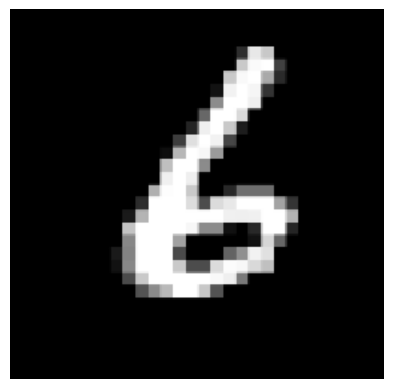

In [14]:
# Affichez l'image
plt.imshow(custom_image, cmap='gray')
plt.axis('off')  # Pour masquer les axes
plt.show()

In [15]:
# Convertissez l'image en niveaux de gris comme les entrainements
custom_image = custom_image.convert("L")

In [16]:
# Ajoutez une dimension de canal pour obtenir la forme requise
custom_image = np.array(custom_image)[:, :, np.newaxis]

In [17]:
# Redimensionnez l'image à la taille attendue (28x28)
custom_image = image.smart_resize(custom_image, (28, 28))

In [18]:
# Normalisez l'image
custom_image = custom_image.astype('float32') / 255

In [19]:
# Prédiction pour chaque classe dans predicted_label
predicted_label = model.predict(np.expand_dims(custom_image, axis=0))

1/1 [==============================] - 0s 121ms/step


In [20]:
# Récupération de la classe avec la valeur maxi
predicted_class = np.argmax(predicted_label)

In [21]:
# Obtenez le pourcentage de confiance pour la classe prédite
confidence = np.max(predicted_label) * 100

In [23]:
# Classe prédicte et % de prédiction
print(f'Classe prédite : {predicted_class}')
print(f'Pourcentage de confiance : {confidence}%')

Classe prédite : 6
Pourcentage de confiance : 99.99967813491821%


# Enregistrement du modèle

In [24]:
# Save the model
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Utilisation du modèle sauvegardé

In [25]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0